# **EXPLORATORY DATA ANALYSIS OF H1-B VISA DATASET 2019 :**


###  IMPORTING LIBRARIES ##

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/h1b-visa-dataset/H-1B_Disclosure_Data_FY2019.csv


In [2]:
import numpy as np 
import re
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly
import getpass 
import sys
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from statistics import mode
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [3]:
df = pd.read_csv('../input/h1b-visa-dataset/H-1B_Disclosure_Data_FY2019.csv', low_memory = False)
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1048547, 260)

In [5]:
# df = df[:200000]
# df.shape

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,PERIOD_OF_EMPLOYMENT_END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS_1,SECONDARY_ENTITY_1,SECONDARY_ENTITY_BUSINESS_NAME_1,WORKSITE_ADDRESS1_1,WORKSITE_ADDRESS2_1,WORKSITE_CITY_1,WORKSITE_COUNTY_1,WORKSITE_STATE_1,WORKSITE_POSTAL_CODE_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,PW_TRACKING_NUMBER_1,PW_WAGE_LEVEL_1,PW_OES_YEAR_1,PW_OTHER_SOURCE_1,PW_NON-OES_YEAR_1,PW_SURVEY_PUBLISHER_1,PW_SURVEY_NAME_1,WORKSITE_WORKERS_2,SECONDARY_ENTITY_2,SECONDARY_ENTITY_BUSINESS_NAME_2,WORKSITE_ADDRESS1_2,WORKSITE_ADDRESS2_2,WORKSITE_CITY_2,WORKSITE_COUNTY_2,WORKSITE_STATE_2,WORKSITE_POSTAL_CODE_2,WAGE_RATE_OF_PAY_FROM_2,WAGE_RATE_OF_PAY_TO_2,WAGE_UNIT_OF_PAY_2,PREVAILING_WAGE_2,PW_UNIT_OF_PAY_2,PW_TRACKING_NUMBER_2,PW_WAGE_LEVEL_2,PW_OES_YEAR_2,PW_OTHER_SOURCE_2,PW_NON-OES_YEAR_2,PW_SURVEY_PUBLISHER_2,PW_SURVEY_NAME_2,WORKSITE_WORKERS_3,SECONDARY_ENTITY_3,SECONDARY_ENTITY_BUSINESS_NAME_3,WORKSITE_ADDRESS1_3,WORKSITE_ADDRESS2_3,WORKSITE_CITY_3,WORKSITE_COUNTY_3,WORKSITE_STATE_3,WORKSITE_POSTAL_CODE_3,WAGE_RATE_OF_PAY_FROM_3,WAGE_RATE_OF_PAY_TO_3,WAGE_UNIT_OF_PAY_3,PREVAILING_WAGE_3,PW_UNIT_OF_PAY_3,PW_TRACKING_NUMBER_3,PW_WAGE_LEVEL_3,PW_OES_YEAR_3,PW_OTHER_SOURCE_3,PW_NON-OES_YEAR_3,PW_SURVEY_PUBLISHER_3,PW_SURVEY_NAME_3,WORKSITE_WORKERS_4,SECONDARY_ENTITY_4,SECONDARY_ENTITY_BUSINESS_NAME_4,WORKSITE_ADDRESS1_4,WORKSITE_ADDRESS2_4,WORKSITE_CITY_4,WORKSITE_COUNTY_4,WORKSITE_STATE_4,WORKSITE_POSTAL_CODE_4,WAGE_RATE_OF_PAY_FROM_4,WAGE_RATE_OF_PAY_TO_4,WAGE_UNIT_OF_PAY_4,PREVAILING_WAGE_4,PW_UNIT_OF_PAY_4,PW_TRACKING_NUMBER_4,PW_WAGE_LEVEL_4,PW_OES_YEAR_4,PW_OTHER_SOURCE_4,PW_NON-OES_YEAR_4,PW_SURVEY_PUBLISHER_4,PW_SURVEY_NAME_4,WORKSITE_WORKERS_5,SECONDARY_ENTITY_5,SECONDARY_ENTITY_BUSINESS_NAME_5,WORKSITE_ADDRESS1_5,WORKSITE_ADDRESS2_5,WORKSITE_CITY_5,WORKSITE_COUNTY_5,WORKSITE_STATE_5,WORKSITE_POSTAL_CODE_5,WAGE_RATE_OF_PAY_FROM_5,WAGE_RATE_OF_PAY_TO_5,WAGE_UNIT_OF_PAY_5,PREVAILING_WAGE_5,PW_UNIT_OF_PAY_5,PW_TRACKING_NUMBER_5,PW_WAGE_LEVEL_5,PW_OES_YEAR_5,PW_OTHER_SOURCE_5,PW_NON-OES_YEAR_5,PW_SURVEY_PUBLISHER_5,PW_SURVEY_NAME_5,WORKSITE_WORKERS_6,SECONDARY_ENTITY_6,SECONDARY_ENTITY_BUSINESS_NAME_6,WORKSITE_ADDRESS1_6,WORKSITE_ADDRESS2_6,WORKSITE_CITY_6,WORKSITE_COUNTY_6,WORKSITE_STATE_6,WORKSITE_POSTAL_CODE_6,WAGE_RATE_OF_PAY_FROM_6,WAGE_RATE_OF_PAY_TO_6,WAGE_UNIT_OF_PAY_6,PREVAILING_WAGE_6,PW_UNIT_OF_PAY_6,PW_TRACKING_NUMBER_6,PW_WAGE_LEVEL_6,PW_OES_YEAR_6,PW_OTHER_SOURCE_6,PW_NON-OES_YEAR_6,PW_SURVEY_PUBLISHER_6,PW_SURVEY_NAME_6,WORKSITE_WORKERS_7,SECONDARY_ENTITY_7,SECONDARY_ENTITY_BUSINESS_NAME_7,WORKSITE_ADDRESS1_7,WORKSITE_ADDRESS2_7,WORKSITE_CITY_7,WORKSITE_COUNTY_7,WORKSITE_STATE_7,WORKSITE_POSTAL_CODE_7,WAGE_RATE_OF_PAY_FROM_7,WAGE_RATE_OF_PAY_TO_7,WAGE_UNIT_OF_PAY_7,PREVAILING_WAGE_7,PW_UNIT_OF_PAY_7,PW_TRACKING_NUMBER_7,PW_WAGE_LEVEL_7,PW_OES_YEAR_7,PW_OTHER_SOURCE_7,PW_NON-OES_YEAR_7,PW_SURVEY_PUBLISHER_7,PW_SURVEY_NAME_7,WORKSITE_WORKERS_8,SECONDARY_ENTITY_8,SECONDARY_ENTITY_BUSINESS_NAME_8,WORKSITE_ADDRESS1_8,WORKSITE_ADDRESS2_8,WORKSITE_CITY_8,WORKSITE_COUNTY_8,WORKSITE_STATE_8,WORKSITE_POSTAL_CODE_8,WAGE_RATE_OF_PAY_FROM_8,WAGE_RATE_OF_PAY_TO_8,WAGE_UNIT_OF_PAY_8,PREVAI

In [7]:
df.apply(lambda x:len(x.unique()))

CASE_NUMBER           664617
CASE_STATUS                5
CASE_SUBMITTED        251929
DECISION_DATE           8084
ORIGINAL_CERT_DATE      2468
                       ...  
WILLFUL_VIOLATOR           3
SUPPORT_H1B                3
STATUTORY_BASIS            4
MASTERS_EXEMPTION          3
PUBLIC_DISCLOSURE          4
Length: 260, dtype: int64

In [8]:
df = df[df.VISA_CLASS == 'H-1B']

In [9]:
df.CASE_STATUS.value_counts()

CERTIFIED              578640
CERTIFIED-WITHDRAWN     46050
WITHDRAWN               19227
DENIED                   5166
Name: CASE_STATUS, dtype: int64

In [10]:
warnings.filterwarnings("ignore")
df.CASE_STATUS[df['CASE_STATUS']=='WITHDRAWN'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

In [11]:
df.EMPLOYER_COUNTRY.value_counts()

UNITED STATES OF AMERICA    621467
CANADA                          25
INDIA                            3
GUATEMALA                        2
ALBANIA                          2
TURKEY                           1
AFGHANISTAN                      1
AUSTRALIA                        1
Name: EMPLOYER_COUNTRY, dtype: int64

In [12]:
df= df[df.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']

In [13]:
df.isnull().sum()[df.isnull().sum() > 0]

ORIGINAL_CERT_DATE        600216
JOB_TITLE                      1
SOC_CODE                       4
SOC_TITLE                      4
TOTAL_WORKER_POSITIONS         2
                           ...  
WILLFUL_VIOLATOR              22
SUPPORT_H1B               390907
STATUTORY_BASIS           413515
MASTERS_EXEMPTION         620175
PUBLIC_DISCLOSURE           4906
Length: 244, dtype: int64

###  SELECTING RELEVANT FEATURES -

In [14]:
to_select = ['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
             'PERIOD_OF_EMPLOYMENT_START_DATE', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'FULL_TIME_POSITION',
             'NEW_CONCURRENT_EMPLOYMENT', 'PREVAILING_WAGE_1', 'CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT', 
             'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR',
             'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1', 'TOTAL_WORKER_POSITIONS']

to_select_1 = ['WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1', 'PREVAILING_WAGE_1', 'WAGE_RATE_OF_PAY_TO_1']

In [15]:
df1 = df[to_select]
df1.head()

df2 = df[to_select_1]

In [16]:
df1.dtypes

CASE_NUMBER                         object
CASE_STATUS                         object
EMPLOYER_NAME                       object
SECONDARY_ENTITY_1                  object
AGENT_REPRESENTING_EMPLOYER         object
PERIOD_OF_EMPLOYMENT_START_DATE     object
JOB_TITLE                           object
SOC_TITLE                           object
SOC_CODE                            object
NAICS_CODE                         float64
FULL_TIME_POSITION                  object
NEW_CONCURRENT_EMPLOYMENT          float64
PREVAILING_WAGE_1                  float64
CONTINUED_EMPLOYMENT                object
CHANGE_PREVIOUS_EMPLOYMENT         float64
CHANGE_EMPLOYER                    float64
AMENDED_PETITION                   float64
H-1B_DEPENDENT                      object
SUPPORT_H1B                         object
WILLFUL_VIOLATOR                    object
WAGE_RATE_OF_PAY_FROM_1             object
WAGE_UNIT_OF_PAY_1                  object
TOTAL_WORKER_POSITIONS             float64
dtype: obje

### DISTRIBUTION OF VISA CASES WITH THE COMPANIES -

<AxesSubplot:>

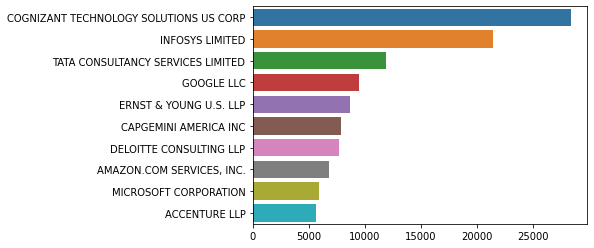

In [17]:
emp = df1['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

### * PIE chart showing different cases of CASE-STATUS :

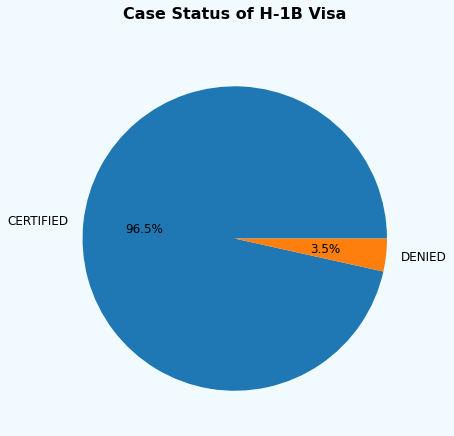

In [18]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = df1.CASE_NUMBER.groupby(df1.CASE_STATUS).count()
pie(sums, labels = sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Case Status of H-1B Visa',
          fontsize = 16,
          fontweight = 'heavy',
          loc = 'center', 
          pad = 30); #semi-colon for hide text before graph output

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

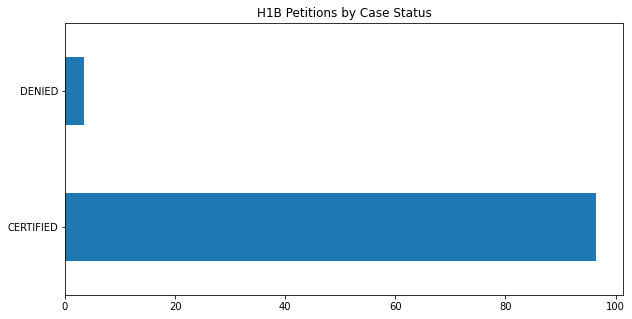

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
(df1.CASE_STATUS.value_counts(normalize=True)*100).plot(kind='barh',title='H1B Petitions by Case Status')

###  What are the top OCCUPATIONS of the H1-B's being filed by the employers ?

<AxesSubplot:title={'center':'Occupation of the top h1b companies'}, ylabel='SOC_TITLE'>

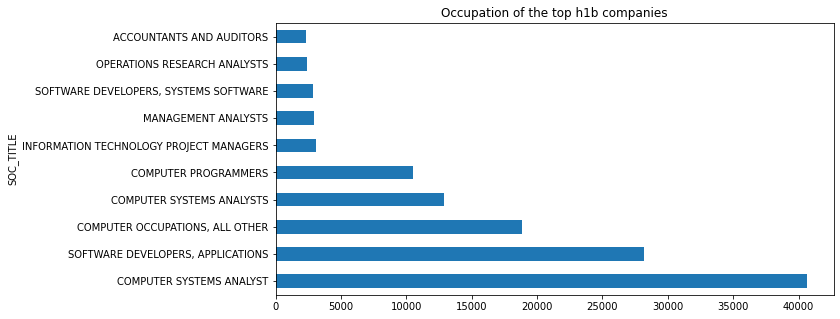

In [20]:
top = df1.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_df = df1.loc[df1.EMPLOYER_NAME.isin(top)]
top_df.groupby('SOC_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Occupation of the top h1b companies')

### Which employers file the most petitions ?

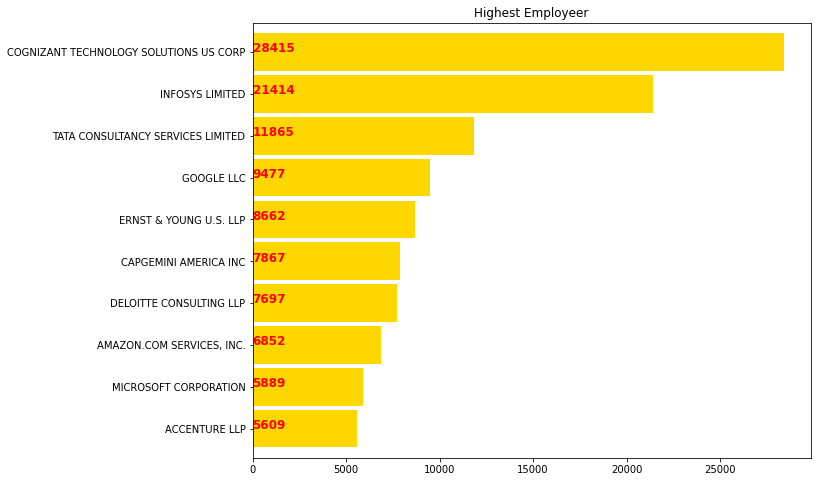

In [21]:
plt.figure(figsize=(10,8))
ax = df1['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(df['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.8, i, v,fontsize=12,color='r',weight='bold')
plt.title('Highest Employeer')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

###  WAGE DISTRIBUTION -

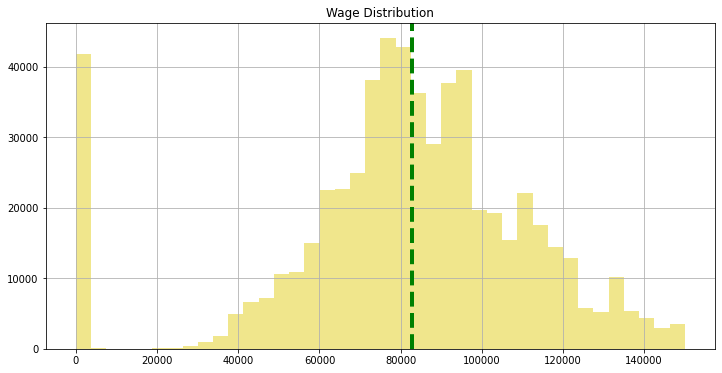

In [22]:
plt.figure(figsize=(12,6))
df1[df1['PREVAILING_WAGE_1']<150000].PREVAILING_WAGE_1.hist(bins=40,color='khaki')
plt.axvline(df[df['PREVAILING_WAGE_1']<=150000].PREVAILING_WAGE_1.median(), color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

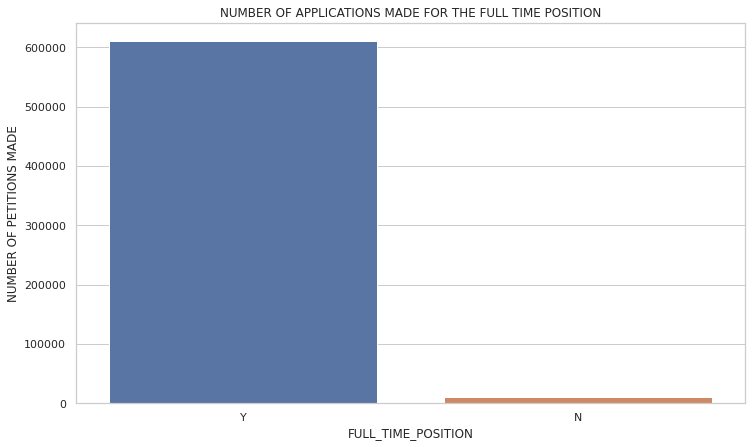

In [23]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df1)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

<AxesSubplot:>

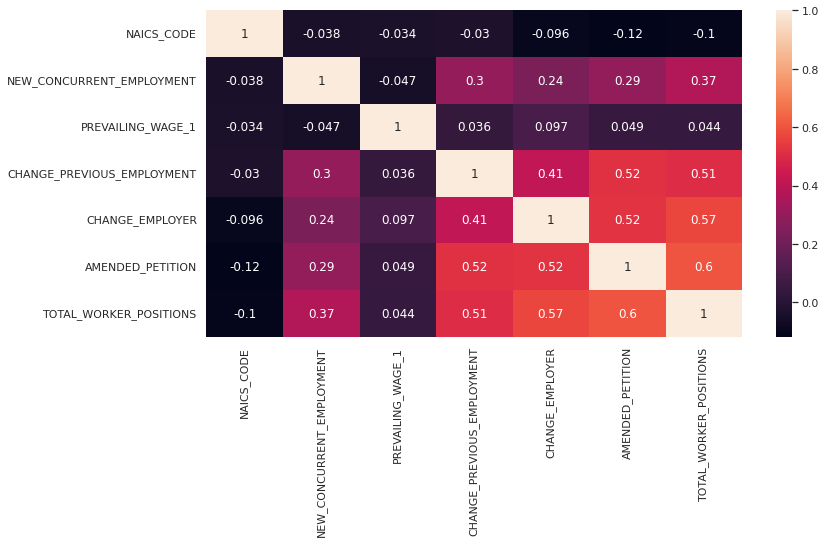

In [24]:
cor = df1.corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor, annot = True)

In [25]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           6
SECONDARY_ENTITY_1                  53118
AGENT_REPRESENTING_EMPLOYER             6
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               1
SOC_TITLE                               4
SOC_CODE                                4
NAICS_CODE                              1
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               1
PREVAILING_WAGE_1                    4894
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                         22
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                       22
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      7
TOTAL_WORKER_POSITIONS                  2
dtype: int64

# **FEATURE ENGINEERING** 

In [26]:
df1['CASE_STATUS'] = df1['CASE_STATUS'].map({'CERTIFIED' : 1, 'DENIED' : 0})

In [27]:
df1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,PERIOD_OF_EMPLOYMENT_START_DATE,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NEW_CONCURRENT_EMPLOYMENT,PREVAILING_WAGE_1,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
6,I-200-18289-307616,0,MH SUB I LLC,NaN,Y,03/07/2019,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,Y,0.0,97365.0,0,1.0,0.0,0.0,N,NaN,N,100000,Year,1.0
7,I-200-19015-877040,0,"KIIP, INC.",N,Y,27-05-2019,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,Y,0.0,131685.0,1,0.0,0.0,0.0,N,NaN,N,131685,Year,1.0
8,I-200-19031-693896,0,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",N,Y,23-02-2019,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,Y,0.0,97365.0,1,0.0,0.0,0.0,N,NaN,N,99750,Year,1.0
9,I-200-19056-659352,0,"SOLAREDGE TECHNOLOGIES, INC.",N,Y,01-09-2019,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,Y,0.0,126901.0,0,0.0,0.0,0.0,N,NaN,N,130000,Year,1.0
10,I-200-19066-002723,0,SOULSIGHT,N,Y,06-09-2019,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541430.0,Y,0.0,47549.0,0,0.0,0.0,0.0,N,NaN,N,50000,Year,1.0


In [28]:
df1.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False)

Y      436014
N      185447
NaN         6
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [29]:
df1.WILLFUL_VIOLATOR.value_counts(dropna = False)

N      621171
Y         274
NaN        22
Name: WILLFUL_VIOLATOR, dtype: int64

In [30]:
df1['FULL_TIME_POSITION'] = df1['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].map({'N' : 0, 'Y' : 1})
df1['SECONDARY_ENTITY_1'] = df1['SECONDARY_ENTITY_1'].map({'N' : 0, 'Y' : 1})
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].map({'N' : 0, 'Y' : 1})
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].map({'N' : 0, 'Y' : 1})

In [31]:
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].fillna(df1['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
df1['SECONDARY_ENTITY_1'] = df1['SECONDARY_ENTITY_1'].fillna(df1['SECONDARY_ENTITY_1'].mode()[0])
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].fillna(df1['H-1B_DEPENDENT'].mode()[0])
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].fillna(df1['WILLFUL_VIOLATOR'].mode()[0])
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].fillna(df1['EMPLOYER_NAME'].mode()[0])
df1['JOB_TITLE'] = df1['JOB_TITLE'].fillna(df1['JOB_TITLE'].mode()[0])
df1['SOC_CODE'] = df1['SOC_CODE'].fillna(df1['SOC_CODE'].mode()[0])
df1['NAICS_CODE'] = df1['NAICS_CODE'].fillna(df1['NAICS_CODE'].mode()[0])
df1['SOC_CODE'] = df1['SOC_CODE'].fillna(df1['SOC_CODE'].mode()[0])
df1['NEW_CONCURRENT_EMPLOYMENT'] = df1['NEW_CONCURRENT_EMPLOYMENT'].fillna(df1['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
df1['WAGE_UNIT_OF_PAY_1'] = df1['WAGE_UNIT_OF_PAY_1'].fillna(df1['WAGE_UNIT_OF_PAY_1'].mode()[0])
df1['TOTAL_WORKER_POSITIONS'] = df1['TOTAL_WORKER_POSITIONS'].fillna(df1['TOTAL_WORKER_POSITIONS'].mode()[0])

In [32]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                    4894
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
TOTAL_WORKER_POSITIONS                  0
dtype: int64

In [33]:
df1['H-1B_DEPENDENT'].value_counts()

0.0    391173
1.0    230294
Name: H-1B_DEPENDENT, dtype: int64

In [34]:
df1['NEW_CONCURRENT_EMP'] = df1['NEW_CONCURRENT_EMPLOYMENT']
df1['NEW_CONCURRENT_EMP'] = np.where(df1['NEW_CONCURRENT_EMP'].isin([0]), '0',
                             np.where(df1['NEW_CONCURRENT_EMP'].isin([1]), '1', '>1'))

df1['CHANGE_PREVIOUS_EMP'] = df1['CHANGE_PREVIOUS_EMPLOYMENT']
df1['CHANGE_PREVIOUS_EMP'] = np.where(df1['CHANGE_PREVIOUS_EMPLOYMENT'].isin([0]), '0',
                             np.where(df1['CHANGE_PREVIOUS_EMPLOYMENT'].isin([1]), '1', '>1'))

df1['CONTINUED_EMPLOYMENT_BIN'] = df1['CONTINUED_EMPLOYMENT']
df1['CONTINUED_EMPLOYMENT_BIN'] = np.where(df1['CONTINUED_EMPLOYMENT'].isin([0]), '0',
                             np.where(df1['CONTINUED_EMPLOYMENT'].isin([1]), '1', '>1'))

df1['AMENDED_PETITION_BIN'] = df1['AMENDED_PETITION']
df1['AMENDED_PETITION_BIN'] = np.where(df1['AMENDED_PETITION'].isin([0]), '0',
                             np.where(df1['AMENDED_PETITION'].isin([1]), '1', '>1'))

df1['CHANGE_EMPLOYER_BIN'] = df1['CHANGE_EMPLOYER']
df1['CHANGE_EMPLOYER_BIN'] = np.where(df1['CHANGE_EMPLOYER'].isin([0]), '0',
                             np.where(df1['CHANGE_EMPLOYER'].isin([1]), '1', '>1'))

df1['TOTAL_WORKER_POSITIONS_BIN'] = df1['TOTAL_WORKER_POSITIONS']
df1['TOTAL_WORKER_POSITIONS_BIN'] = np.where(df1['TOTAL_WORKER_POSITIONS'].isin([0]), '0',
                             np.where(df1['TOTAL_WORKER_POSITIONS'].isin([1]), '1', '>1'))

In [35]:
df1.TOTAL_WORKER_POSITIONS_BIN.value_counts()

1     584809
>1     36658
Name: TOTAL_WORKER_POSITIONS_BIN, dtype: int64

In [36]:
df1.AMENDED_PETITION_BIN.value_counts()

0     529488
1      79641
>1     12338
Name: AMENDED_PETITION_BIN, dtype: int64

In [37]:
df1['PREVAILING_WAGE_1'].value_counts(dropna = False)

109242.0    8251
96366.0     7601
93538.0     5426
113318.0    5191
NaN         4894
            ... 
92975.0        1
159723.0       1
96245.0        1
120508.0       1
109820.0       1
Name: PREVAILING_WAGE_1, Length: 25061, dtype: int64

In [38]:
q1 = df1["PREVAILING_WAGE_1"].quantile(0.25)
q3 = df1["PREVAILING_WAGE_1"].quantile(0.75)
IQR = q3 - q1
mean = df1['PREVAILING_WAGE_1'].mean()

In [39]:
df1['PREVAILING_WAGE_1'] = df1['PREVAILING_WAGE_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

<Figure size 1440x1440 with 0 Axes>

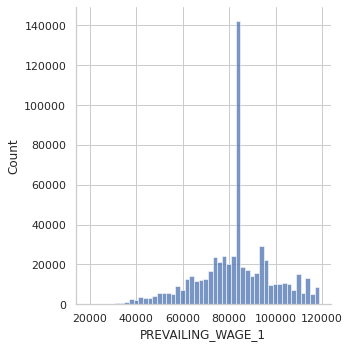

In [40]:
plt.figure(figsize=(20,20))
sns.displot(df1['PREVAILING_WAGE_1'], bins = 50)

<AxesSubplot:>

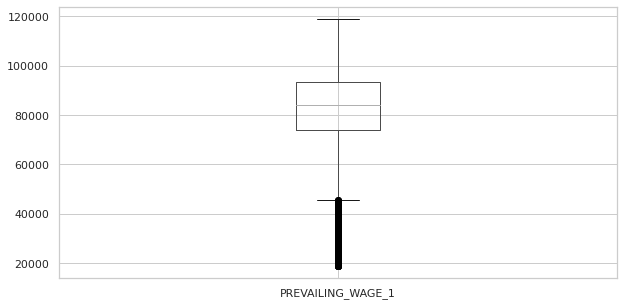

In [41]:
df1.boxplot(column='PREVAILING_WAGE_1')

In [42]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                       0
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
TOTAL_WORKER_POSITIONS                  0
NEW_CONCURRENT_EMP                

In [43]:
df1.SOC_TITLE.value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS        206446
COMPUTER OCCUPATIONS, ALL OTHER           54387
COMPUTER SYSTEMS ANALYST                  40796
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     30162
COMPUTER SYSTEMS ANALYSTS                 29809
                                          ...  
WATER / WASTEWATER ENGINEER                   1
WATER/WASTEWATER ENGINEERS                    1
ELECTRICAL ENGINEERS, NON R&D                 1
17-2072                                       1
15-2031                                       1
Name: SOC_TITLE, Length: 832, dtype: int64

In [44]:
df1['OCCUPATION'] = np.nan
df1['SOC_TITLE'] = df1['SOC_TITLE'].str.lower()
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('computer','programmer', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('software','web developer', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('database', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('math','statistic', na=False)] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('predictive model','stats', na=False)] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('teacher','linguist', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('professor','Teach', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('school principal', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('medical','doctor', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('physician','dentist', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('Health','Physical Therapists', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('surgeon','nurse', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('psychiatry', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('chemist','physicist', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('biology','scientist', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('biologi','clinical research', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('public relation','manage', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('management','operation', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('chief','plan', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('executive', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('advertis','marketing', na=False)] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('promotion','market research', na=False)] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('business','business analyst', na=False)] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('business systems analyst', na=False)] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('accountant','finance', na=False)] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('financial', na=False)] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('engineer','architect', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('surveyor','carto', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('technician','drafter', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('information security','information tech', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('education','law', na=False)] = 'Administrative Occupation'

df1['OCCUPATION']= df1.OCCUPATION.replace(np.nan, 'Others', regex=True)

In [45]:
df1.OCCUPATION.value_counts(dropna = False)

Computer Occupations          411602
Others                         76964
Architecture & Engineering     61600
Financial Occupation           24651
Medical Occupations            11859
Management Occupation          11024
Advance Sciences                9728
Education Occupations           7769
Administrative Occupation       3636
Business Occupation             1856
Mathematical Occupations         576
Marketing Occupation             202
Name: OCCUPATION, dtype: int64

In [46]:
df1['JOB_TITLE_NEW'] = 'others'
df1['JOB_TITLE'] = df1['JOB_TITLE'].str.upper()
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|HADOOP|INFORMATICA|SQL|BI|SCRUM|VALIDATION|APPLICATIONS|UI|PROGRAMMER|DEVELOPER|SOLUTION|RPA')] = 'IT & SOFTWARE ENGINEERS'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('LANDSCAPE|CAD|SITE|FIELD|QUALITY|MECHANICAL DESIGN|STRUCTURAL|DESIGNER|SIMULATION|ENGINEERING|MARINE|INDUSTRIAL|MATERIALS|MECHANICAL|MANUFACTURING|CIVIL')] = 'MECHANICAL & CIVIL ENGINEER '
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('ACCOUNTANT|FINANCIAL|QUANTITATIVE|RISK|BUDGET|TAX')] = 'FINANCE TEAM'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('PRESIDENT|DIRECTOR|MANAGER')] = 'Manager & DIRECTORS'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ELECTRICAL|CHEMICAL')] = 'ELECTRICAL ENGINEERS'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('SERVICE|AEM|EMBEDDED|DIGITAL|NETWORK|CONTROLS|HARDWARE|FUNCTIONAL|ELECTRICAL|CHEMICAL')] = 'ELECTRONICS & ELECTRONICS ENGINEERS TEAM'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('PUBLIC|LAWYERS|ATTORNEY|LAW')] = 'LAW TEAM'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('SALESFORCE|MARKET|MARKETING|SUPPLY')] = 'MARKETING TEAM'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('SPEECH|BIG|ORACLE|MACHINE|DATABASE|DATA|SCIENTIST|ASSOCIATES')] = 'DATABASE & SCIENTISTS'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('ARCHITECT|ARCHITECTURAL')] = 'ARCHITECT'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('TEACHER|PROFESSOR|POSTDOCTORAL|FELLOW|SCHOLAR|LECTURER|LABORATORY')] = 'EDUCATIONAL ORGANISATION'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('BUSINESS|ADMINISTRATOR|INVESTMENT|ACCOUNT')] = 'BUSINESS TEAM'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('DENTIST|HOSPITALIST|THERAPIST|PSYCHIATRIST|PEDIATRICIAN|PHYSICIAN|FAMILY|NEPHROLOGIST')] = 'MEDICAL TEAM'
df1['JOB_TITLE_NEW'][df1['JOB_TITLE'].str.contains('SENIOR|SR.|SR')] = 'SENIOR TEAM'

In [47]:
df1.JOB_TITLE_NEW.value_counts(dropna = False)

IT & SOFTWARE ENGINEERS                     236534
SENIOR TEAM                                  96903
others                                       76262
Manager & DIRECTORS                          48149
BUSINESS TEAM                                33107
DATABASE & SCIENTISTS                        26156
MECHANICAL & CIVIL ENGINEER                  25726
EDUCATIONAL ORGANISATION                     20045
ARCHITECT                                    18901
ELECTRONICS & ELECTRONICS ENGINEERS TEAM     13912
MEDICAL TEAM                                  9863
MARKETING TEAM                                7659
FINANCE TEAM                                  6551
LAW TEAM                                      1699
Name: JOB_TITLE_NEW, dtype: int64

In [48]:
df1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,PERIOD_OF_EMPLOYMENT_START_DATE,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NEW_CONCURRENT_EMPLOYMENT,PREVAILING_WAGE_1,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,TOTAL_WORKER_POSITIONS_BIN,OCCUPATION,JOB_TITLE_NEW
6,I-200-18289-307616,0,MH SUB I LLC,0.0,1.0,03/07/2019,DIRECTOR OF BUSINESS DEVELOPMENT,advertising and promotions managers,11-2011,454111.0,1,0.0,97365.000000,0,1.0,0.0,0.0,0.0,NaN,0.0,100000,Year,1.0,0,1,>1,0,0,1,Marketing Occupation,BUSINESS TEAM
7,I-200-19015-877040,0,"KIIP, INC.",0.0,1.0,27-05-2019,HEAD OF BUSINESS DEVELOPMENT,advertising and promotions managers,11-2011,541990.0,1,0.0,84142.860684,1,0.0,0.0,0.0,0.0,NaN,0.0,131685,Year,1.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM
8,I-200-19031-693896,0,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",0.0,1.0,23-02-2019,"ACCOUNT DIRECTOR, SOCIAL MEDIA",advertising and promotions managers,11-2011,541820.0,1,0.0,97365.000000,1,0.0,0.0,0.0,0.0,NaN,0.0,99750,Year,1.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM
9,I-200-19056-659352,0,"SOLAREDGE TECHNOLOGIES, INC.",0.0,1.0,01-09-2019,PRODUCT MARKETING MANAGER,advertising and promotions managers,11-2011,334413.0,1,0.0,84142.860684,0,0.0,0.0,0.0,0.0,NaN,0.0,130000,Year,1.0,0,0,>1,0,0,1,Marketing Occupation,MARKETING TEAM
10,I-200-19066-002723,0,SOULSIGHT,0.0,1.0,06-09-2019,ASSOCIATE ACCOUNT STRATEGY MANAGER,advertising and promotions managers,11-2011,541430.0,1,0.0,47549.000000,0,0.0,0.0,0.0,0.0,NaN,0.0,50000,Year,1.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM


In [49]:
df1.EMPLOYER_NAME.value_counts(dropna = False)

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    28421
INFOSYS LIMITED                           21414
TATA CONSULTANCY SERVICES LIMITED         11865
GOOGLE LLC                                 9477
ERNST & YOUNG U.S. LLP                     8662
                                          ...  
ARCHITECTURAL INTELLIGENCE D.P.C.             1
TINA T. CHIANG ACCOUNTANCY CORP.              1
POGOSYAN CORPORATION                          1
NEW TANG DYNASTY TELEVISION                   1
CORNERSTONE CONTROLS INC.                     1
Name: EMPLOYER_NAME, Length: 63944, dtype: int64

In [50]:
# df1['NEW_EMPLOYER'] = np.nan
# df1.shape

# df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].str.lower()
# df1.NEW_EMPLOYER[df1['EMPLOYER_NAME'].str.contains('university', na = False)] = 'university'
# df1['NEW_EMPLOYER']= df1.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

# df1['NEW_EMPLOYER'] = df1['NEW_EMPLOYER'].map({'university' : 1, 'non university' : 0})

df1['EMPLOYER_BRANCH'] = 'others'
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].str.upper()
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('APPLE|GOOGLE|FACEBOOK|CAPGEMINI|WIPRO|TWITTER|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA')] = 'TOP TECH'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC')] = 'ELECTRONIC & LOGISTICS SERVICES'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('UNIVERSITY|UNIVERSITIES|ACADEMIC|INSTITUTIONS|SCIENCE|NATIONAL|SCHOOL')] = 'UNIVERSITY'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('MASTER|BANK|CARD|VISA')] = 'BANKING COMPANIES'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('HEALTH|FIN|ECLINICALWORKS|MEDTRONIC|FINANCIAL|MEDICAL|MED|CENTER')] = 'FINANCE AND MEDICAL SOLUTIONS'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('BUSINESS|MANAGEMENT')] = 'BUSINESS SOLUTIONS'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('LABS|COMMUNICATION|NETWORK|DIGITAL|NETWORKS')] = 'RESEARCH LABS & NETWORK'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('AUTOBILE|AUTOMOTIVE|MOTOR|AUTO|FORD|PUMP|ELECTRIC|TESLA|BOSCH')] = 'AUTOMOTIVE & ELECTRICAL'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('DEVELOPMENT|IT|COMPUTER|CYBER|TECHNOLOGY|TECH|SOLUTIONS|WEB|INFOTECH|CLOUD|VISION|GLOBAL|SYSTEMS|TECHNOSOFT|TECHNO|SERVICES|SECURITIES|SECURITY|TECHNOLOGIES|DATA')] = 'TECH SOLUTIONS'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('INTERNATIONAL|CONSULTING|CONSULTANT|RESOURCES|GROUP|ASSOCIATES|ANALYSTS')] = 'CONSULTING COMPANIES'
df1['EMPLOYER_BRANCH'][df1['EMPLOYER_NAME'].str.contains('PRODUCT|PRODUCTS|ENTERPRISE|ENTERPRISES')] = 'PRODUCT &ENTERPRISE COMPANIES'

In [51]:
df1.EMPLOYER_BRANCH.value_counts(dropna = False)

TECH SOLUTIONS                     276869
others                             198802
CONSULTING COMPANIES                54101
TOP TECH                            39148
FINANCE AND MEDICAL SOLUTIONS       13196
ELECTRONIC & LOGISTICS SERVICES     10492
RESEARCH LABS & NETWORK              6928
AUTOMOTIVE & ELECTRICAL              5226
BANKING COMPANIES                    4517
PRODUCT &ENTERPRISE COMPANIES        4383
UNIVERSITY                           4023
BUSINESS SOLUTIONS                   3782
Name: EMPLOYER_BRANCH, dtype: int64

In [52]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                       0
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
TOTAL_WORKER_POSITIONS                  0
NEW_CONCURRENT_EMP                

In [53]:
df1 = df1.drop(['CASE_NUMBER','SUPPORT_H1B', 'SOC_TITLE', 'EMPLOYER_NAME', 'PERIOD_OF_EMPLOYMENT_START_DATE', 'NEW_CONCURRENT_EMPLOYMENT', 'JOB_TITLE'
               , 'SOC_CODE', 'NAICS_CODE', 'CHANGE_PREVIOUS_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'AMENDED_PETITION', 'CHANGE_EMPLOYER'
               , 'TOTAL_WORKER_POSITIONS', 'PREVAILING_WAGE_1', 'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1'], axis = 1)

In [54]:
df1.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,TOTAL_WORKER_POSITIONS_BIN,OCCUPATION,JOB_TITLE_NEW,EMPLOYER_BRANCH
6,0,0.0,1.0,1,0.0,0.0,0,1,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,others
7,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,others
8,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,CONSULTING COMPANIES
9,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,MARKETING TEAM,TECH SOLUTIONS
10,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,others


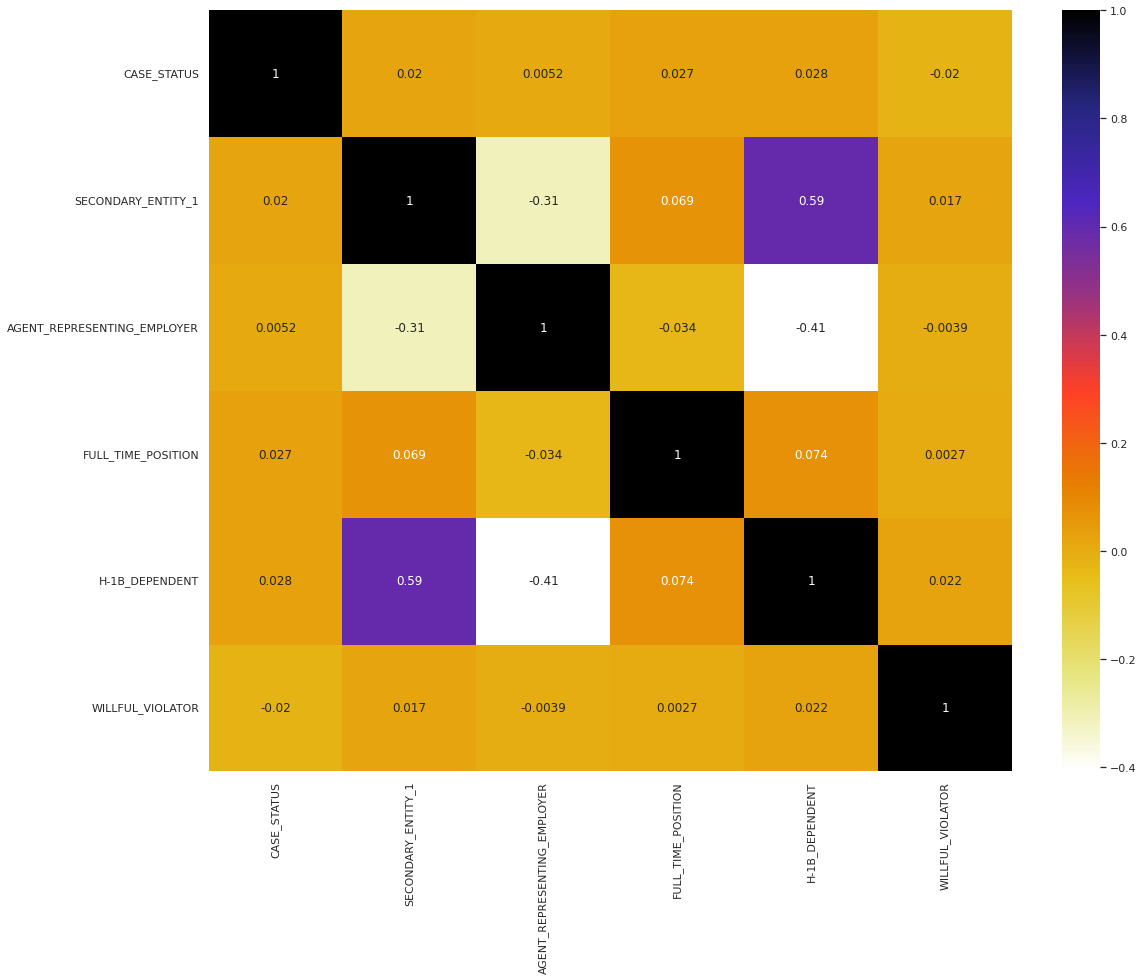

In [55]:
import seaborn as sns
plt.figure(figsize=(18, 14))
cor = df1.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [56]:
df1.dtypes

CASE_STATUS                      int64
SECONDARY_ENTITY_1             float64
AGENT_REPRESENTING_EMPLOYER    float64
FULL_TIME_POSITION               int64
H-1B_DEPENDENT                 float64
WILLFUL_VIOLATOR               float64
NEW_CONCURRENT_EMP              object
CHANGE_PREVIOUS_EMP             object
CONTINUED_EMPLOYMENT_BIN        object
AMENDED_PETITION_BIN            object
CHANGE_EMPLOYER_BIN             object
TOTAL_WORKER_POSITIONS_BIN      object
OCCUPATION                      object
JOB_TITLE_NEW                   object
EMPLOYER_BRANCH                 object
dtype: object

In [57]:
# df1['WAGE_RATE_OF_PAY_FROM_1'] = df1['WAGE_RATE_OF_PAY_FROM_1'].str.replace("[^0-9]", "", regex=True)

In [58]:
# df1['WAGE_RATE_OF_PAY_FROM_1'] = df1['WAGE_RATE_OF_PAY_FROM_1'].astype(float)

In [59]:
# df1 = df1.dropna(subset=['WAGE_RATE_OF_PAY_FROM_1'])

In [60]:
# df1['WAGE_RATE_OF_PAY_FROM_1'].isnull().sum()

In [61]:
df1.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,TOTAL_WORKER_POSITIONS_BIN,OCCUPATION,JOB_TITLE_NEW,EMPLOYER_BRANCH
6,0,0.0,1.0,1,0.0,0.0,0,1,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,others
7,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,others
8,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,CONSULTING COMPANIES
9,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,MARKETING TEAM,TECH SOLUTIONS
10,0,0.0,1.0,1,0.0,0.0,0,0,>1,0,0,1,Marketing Occupation,BUSINESS TEAM,others


In [62]:
df1[['CASE_STATUS', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION','H-1B_DEPENDENT', 
     'WILLFUL_VIOLATOR', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN', 'TOTAL_WORKER_POSITIONS_BIN', 'OCCUPATION', 'JOB_TITLE_NEW', 'EMPLOYER_BRANCH']] = df1[['CASE_STATUS', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION','H-1B_DEPENDENT', 
     'WILLFUL_VIOLATOR', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN', 'TOTAL_WORKER_POSITIONS_BIN', 'OCCUPATION', 'JOB_TITLE_NEW', 'EMPLOYER_BRANCH']] .apply(lambda x: x.astype('category'))

In [63]:
df1.dtypes

CASE_STATUS                    category
SECONDARY_ENTITY_1             category
AGENT_REPRESENTING_EMPLOYER    category
FULL_TIME_POSITION             category
H-1B_DEPENDENT                 category
WILLFUL_VIOLATOR               category
NEW_CONCURRENT_EMP             category
CHANGE_PREVIOUS_EMP            category
CONTINUED_EMPLOYMENT_BIN       category
AMENDED_PETITION_BIN           category
CHANGE_EMPLOYER_BIN            category
TOTAL_WORKER_POSITIONS_BIN     category
OCCUPATION                     category
JOB_TITLE_NEW                  category
EMPLOYER_BRANCH                category
dtype: object

In [64]:
y = df1.CASE_STATUS
X = df1.drop('CASE_STATUS', axis = 1)

seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.columns

Index(['SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
       'FULL_TIME_POSITION', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN',
       'AMENDED_PETITION_BIN', 'CHANGE_EMPLOYER_BIN',
       'TOTAL_WORKER_POSITIONS_BIN', 'OCCUPATION', 'JOB_TITLE_NEW',
       'EMPLOYER_BRANCH'],
      dtype='object')

In [65]:
X_train.isnull().sum()

SECONDARY_ENTITY_1             0
AGENT_REPRESENTING_EMPLOYER    0
FULL_TIME_POSITION             0
H-1B_DEPENDENT                 0
WILLFUL_VIOLATOR               0
NEW_CONCURRENT_EMP             0
CHANGE_PREVIOUS_EMP            0
CONTINUED_EMPLOYMENT_BIN       0
AMENDED_PETITION_BIN           0
CHANGE_EMPLOYER_BIN            0
TOTAL_WORKER_POSITIONS_BIN     0
OCCUPATION                     0
JOB_TITLE_NEW                  0
EMPLOYER_BRANCH                0
dtype: int64

In [66]:
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)

In [67]:
X_test_encode.head()

,SECONDARY_ENTITY_1_0.0,SECONDARY_ENTITY_1_1.0,AGENT_REPRESENTING_EMPLOYER_0.0,AGENT_REPRESENTING_EMPLOYER_1.0,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0.0,H-1B_DEPENDENT_1.0,WILLFUL_VIOLATOR_0.0,WILLFUL_VIOLATOR_1.0,NEW_CONCURRENT_EMP_0,NEW_CONCURRENT_EMP_1,NEW_CONCURRENT_EMP_>1,CHANGE_PREVIOUS_EMP_0,CHANGE_PREVIOUS_EMP_1,CHANGE_PREVIOUS_EMP_>1,CONTINUED_EMPLOYMENT_BIN_>1,AMENDED_PETITION_BIN_0,AMENDED_PETITION_BIN_1,AMENDED_PETITION_BIN_>1,CHANGE_EMPLOYER_BIN_0,CHANGE_EMPLOYER_BIN_1,CHANGE_EMPLOYER_BIN_>1,TOTAL_WORKER_POSITIONS_BIN_1,TOTAL_WORKER_POSITIONS_BIN_>1,OCCUPATION_Administrative Occupation,OCCUPATION_Advance Sciences,OCCUPATION_Architecture & Engineering,OCCUPATION_Business Occupation,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,JOB_TITLE_NEW_ARCHITECT,JOB_TITLE_NEW_BUSINESS TEAM,JOB_TITLE_NEW_DATABASE & SCIENTISTS,JOB_TITLE_NEW_EDUCATIONAL ORGANISATION,JOB_TITLE_NEW_ELECTRONICS & ELECTRONICS ENGINEERS TEAM,JOB_TITLE_NEW_FINANCE TEAM,JOB_TITLE_NEW_IT & SOFTWARE ENGINEERS,JOB_TITLE_NEW_LAW TEAM,JOB_TITLE_NEW_MARKETING TEAM,JOB_TITLE_NEW_MECHANICAL & CIVIL ENGINEER,JOB_TITLE_NEW_MEDICAL TEAM,JOB_TITLE_NEW_Manager & DIRECTORS,JOB_TITLE_NEW_SENIOR TEAM,JOB_TITLE_NEW_others,EMPLOYER_BRANCH_AUTOMOTIVE & ELECTRICAL,EMPLOYER_BRANCH_BANKING COMPANIES,EMPLOYER_BRANCH_BUSINESS SOLUTIONS,EMPLOYER_BRANCH_CONSULTING COMPANIES,EMPLOYER_BRANCH_ELECTRONIC & LOGISTICS SERVICES,EMPLOYER_BRANCH_FINANCE AND MEDICAL SOLUTIONS,EMPLOYER_BRANCH_PRODUCT &ENTERPRISE COMPANIES,EMPLOYER_BRANCH_RESEARCH LABS & NETWORK,EMPLOYER_BRANCH_TECH SOLUTIONS,EMPLOYER_BRANCH_TOP TECH,EMPLOYER_BRANCH_UNIVERSITY,EMPLOYER_BRANCH_others
26597,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
219737,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
528749,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
536978,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
492080,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
y_train.head()

621484    1
582730    1
634998    1
89019     1
88796     1
Name: CASE_STATUS, dtype: category
Categories (2, int64): [0, 1]

# **MODEL BUILDING**

### XGBCLASSIFIER

In [69]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_encode, y_train)
y_pred = xgb_model.predict(X_test_encode.to_numpy())

In [70]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    15   4289]
 [    12 119978]]
              precision    recall  f1-score   support

           0       0.56      0.00      0.01      4304
           1       0.97      1.00      0.98    119990

    accuracy                           0.97    124294
   macro avg       0.76      0.50      0.49    124294
weighted avg       0.95      0.97      0.95    124294



In [71]:
metrics.accuracy_score(y_test, y_pred)

0.9653965597695786

### LOGISTIC REGRESSION

In [72]:
LogReg = LogisticRegression()
LogReg.fit(X_train_encode, y_train)
y_pred = LogReg.predict(X_test_encode.to_numpy())

In [73]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[     0   4304]
 [     0 119990]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4304
           1       0.97      1.00      0.98    119990

    accuracy                           0.97    124294
   macro avg       0.48      0.50      0.49    124294
weighted avg       0.93      0.97      0.95    124294



In [74]:
metrics.accuracy_score(y_test, y_pred)

0.9653724234476322

**LOGISTIC REGRESSION WITH CLASS - WEIGHTS**

In [75]:
LogReg = LogisticRegression(solver='newton-cg', class_weight='balanced')
LogReg.fit(X_train_encode, y_train)
y_pred = LogReg.predict(X_test_encode.to_numpy())

In [76]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2448  1856]
 [50494 69496]]
              precision    recall  f1-score   support

           0       0.05      0.57      0.09      4304
           1       0.97      0.58      0.73    119990

    accuracy                           0.58    124294
   macro avg       0.51      0.57      0.41    124294
weighted avg       0.94      0.58      0.70    124294



In [77]:
metrics.accuracy_score(y_test, y_pred)

0.5788211820361401

### RANDOM FOREST

In [78]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train_encode, y_train)
y_pred = clf.predict(X_test_encode)

In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    43   4261]
 [    93 119897]]
              precision    recall  f1-score   support

           0       0.32      0.01      0.02      4304
           1       0.97      1.00      0.98    119990

    accuracy                           0.96    124294
   macro avg       0.64      0.50      0.50    124294
weighted avg       0.94      0.96      0.95    124294



In [80]:
metrics.accuracy_score(y_test, y_pred)

0.964970151415193

### DOWNSAMPLING THE DATA

In [81]:
df2 = pd.concat([X_train_encode, y_train], axis=1)

df2_majority = df2[df2.CASE_STATUS==1]
df2_minority = df2[df2.CASE_STATUS==0]
 
# Downsample majority class
df2_majority_downsampled = resample(df2_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df2_minority),  # to match minority class
                                 random_state=1234) # reproducible results
 
# Combine minority class with downsampled majority class
df2_downsampled = pd.concat([df2_majority_downsampled, df2_minority])
 
# Display new class counts
df2_downsampled.head()


,SECONDARY_ENTITY_1_0.0,SECONDARY_ENTITY_1_1.0,AGENT_REPRESENTING_EMPLOYER_0.0,AGENT_REPRESENTING_EMPLOYER_1.0,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0.0,H-1B_DEPENDENT_1.0,WILLFUL_VIOLATOR_0.0,WILLFUL_VIOLATOR_1.0,NEW_CONCURRENT_EMP_0,NEW_CONCURRENT_EMP_1,NEW_CONCURRENT_EMP_>1,CHANGE_PREVIOUS_EMP_0,CHANGE_PREVIOUS_EMP_1,CHANGE_PREVIOUS_EMP_>1,CONTINUED_EMPLOYMENT_BIN_>1,AMENDED_PETITION_BIN_0,AMENDED_PETITION_BIN_1,AMENDED_PETITION_BIN_>1,CHANGE_EMPLOYER_BIN_0,CHANGE_EMPLOYER_BIN_1,CHANGE_EMPLOYER_BIN_>1,TOTAL_WORKER_POSITIONS_BIN_1,TOTAL_WORKER_POSITIONS_BIN_>1,OCCUPATION_Administrative Occupation,OCCUPATION_Advance Sciences,OCCUPATION_Architecture & Engineering,OCCUPATION_Business Occupation,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,JOB_TITLE_NEW_ARCHITECT,JOB_TITLE_NEW_BUSINESS TEAM,JOB_TITLE_NEW_DATABASE & SCIENTISTS,JOB_TITLE_NEW_EDUCATIONAL ORGANISATION,JOB_TITLE_NEW_ELECTRONICS & ELECTRONICS ENGINEERS TEAM,JOB_TITLE_NEW_FINANCE TEAM,JOB_TITLE_NEW_IT & SOFTWARE ENGINEERS,JOB_TITLE_NEW_LAW TEAM,JOB_TITLE_NEW_MARKETING TEAM,JOB_TITLE_NEW_MECHANICAL & CIVIL ENGINEER,JOB_TITLE_NEW_MEDICAL TEAM,JOB_TITLE_NEW_Manager & DIRECTORS,JOB_TITLE_NEW_SENIOR TEAM,JOB_TITLE_NEW_others,EMPLOYER_BRANCH_AUTOMOTIVE & ELECTRICAL,EMPLOYER_BRANCH_BANKING COMPANIES,EMPLOYER_BRANCH_BUSINESS SOLUTIONS,EMPLOYER_BRANCH_CONSULTING COMPANIES,EMPLOYER_BRANCH_ELECTRONIC & LOGISTICS SERVICES,EMPLOYER_BRANCH_FINANCE AND MEDICAL SOLUTIONS,EMPLOYER_BRANCH_PRODUCT &ENTERPRISE COMPANIES,EMPLOYER_BRANCH_RESEARCH LABS & NETWORK,EMPLOYER_BRANCH_TECH SOLUTIONS,EMPLOYER_BRANCH_TOP TECH,EMPLOYER_BRANCH_UNIVERSITY,EMPLOYER_BRANCH_others,CASE_STATUS
315539,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
558476,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
239333,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
289196,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
577784,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [82]:
y = df2_downsampled.CASE_STATUS
X = df2_downsampled.drop('CASE_STATUS', axis = 1)

In [83]:
LogReg = LogisticRegression()
LogReg.fit(X, y)
y_pred = LogReg.predict(X_test_encode.to_numpy())

In [84]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2355  1949]
 [48426 71564]]
              precision    recall  f1-score   support

           0       0.05      0.55      0.09      4304
           1       0.97      0.60      0.74    119990

    accuracy                           0.59    124294
   macro avg       0.51      0.57      0.41    124294
weighted avg       0.94      0.59      0.72    124294



In [85]:
metrics.accuracy_score(y_test, y_pred)

0.5947109273174892

### OVERSAMPLING THE DATA

In [86]:
df2 = pd.concat([X_train_encode, y_train], axis=1)

# Separate majority and minority classes
# Separate majority and minority classes
df2_majority = df2[df2.CASE_STATUS==1]
df2_minority = df2[df2.CASE_STATUS==0]

# Upsample minority class
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df2_majority),    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df2_upsampled = pd.concat([df2_majority, df2_minority_upsampled])

In [87]:
df2_upsampled.shape

(959744, 64)

In [88]:
y = df2_upsampled.CASE_STATUS
X = df2_upsampled.drop('CASE_STATUS', axis = 1)

In [89]:
LogReg = LogisticRegression()
LogReg.fit(X, y)
y_pred = LogReg.predict(X_test_encode.to_numpy())

In [90]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2474  1830]
 [50655 69335]]
              precision    recall  f1-score   support

           0       0.05      0.57      0.09      4304
           1       0.97      0.58      0.73    119990

    accuracy                           0.58    124294
   macro avg       0.51      0.58      0.41    124294
weighted avg       0.94      0.58      0.70    124294



In [91]:
metrics.accuracy_score(y_test, y_pred)

0.5777350475485542

### OVERSAMPLING USING SMOTE

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
sm = SMOTE(sampling_strategy = 0.6)
X, y = sm.fit_resample(X_train_encode, y_train)

In [94]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.7)
# fit and apply the transform
X1, y1 = under.fit_resample(X, y)

**LOGISTIC REGRESSION**

In [95]:
LogReg = LogisticRegression()
LogReg.fit(X, y)
y_pred = LogReg.predict(X_test_encode.to_numpy())

In [96]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    69   4235]
 [   646 119344]]
              precision    recall  f1-score   support

           0       0.10      0.02      0.03      4304
           1       0.97      0.99      0.98    119990

    accuracy                           0.96    124294
   macro avg       0.53      0.51      0.50    124294
weighted avg       0.94      0.96      0.95    124294



In [97]:
metrics.accuracy_score(y_test, y_pred)

0.9607302041932837

**RANDOM FOREST**

In [98]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X, y)
y_pred = clf.predict(X_test_encode)

In [99]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   799   3505]
 [  9418 110572]]
              precision    recall  f1-score   support

           0       0.08      0.19      0.11      4304
           1       0.97      0.92      0.94    119990

    accuracy                           0.90    124294
   macro avg       0.52      0.55      0.53    124294
weighted avg       0.94      0.90      0.92    124294



In [100]:
metrics.accuracy_score(y_test, y_pred)

0.89602877049576